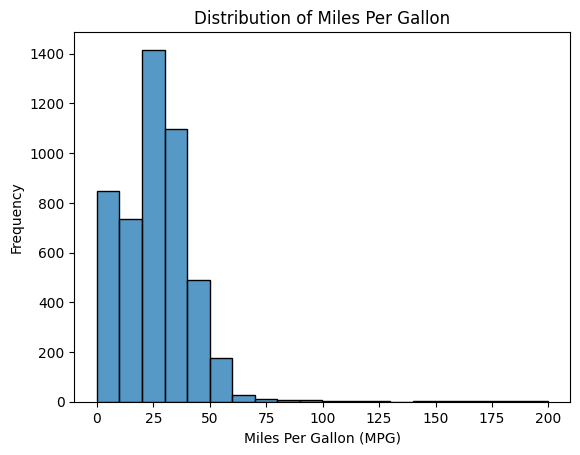

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/shounak/Documents/Personal_Projects/fleet-optimization/data/modified_data.csv')

# Visualize MPG distribution
sns.histplot(df['mpg'], bins=20)
plt.title('Distribution of Miles Per Gallon')
plt.xlabel('Miles Per Gallon (MPG)')
plt.ylabel('Frequency')
#plt.savefig('visualizations/mpg_distribution.png')
plt.show()

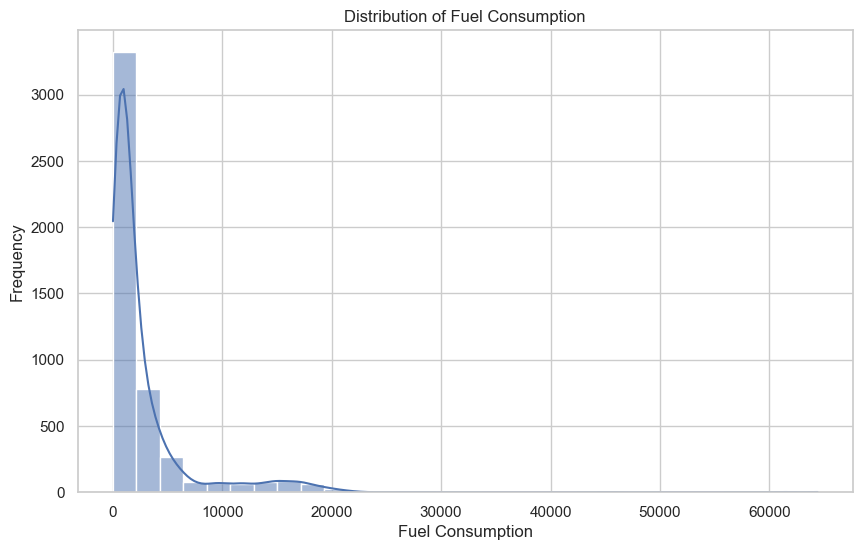

In [2]:
# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Distribution of Fuel Consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['fuel'], bins=30, kde=True)
plt.title('Distribution of Fuel Consumption')
plt.xlabel('Fuel Consumption')
plt.ylabel('Frequency')
plt.show()

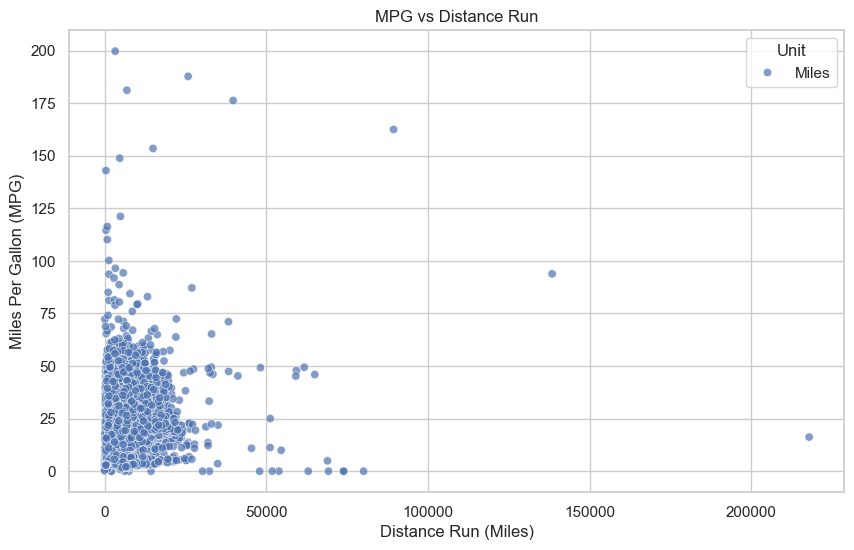

In [3]:
# 2. Relationship between MPG and Distance Run
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='dist_run', y='mpg', hue='unit', alpha=0.7)
plt.title('MPG vs Distance Run')
plt.xlabel('Distance Run (Miles)')
plt.ylabel('Miles Per Gallon (MPG)')
plt.legend(title='Unit')
plt.show()

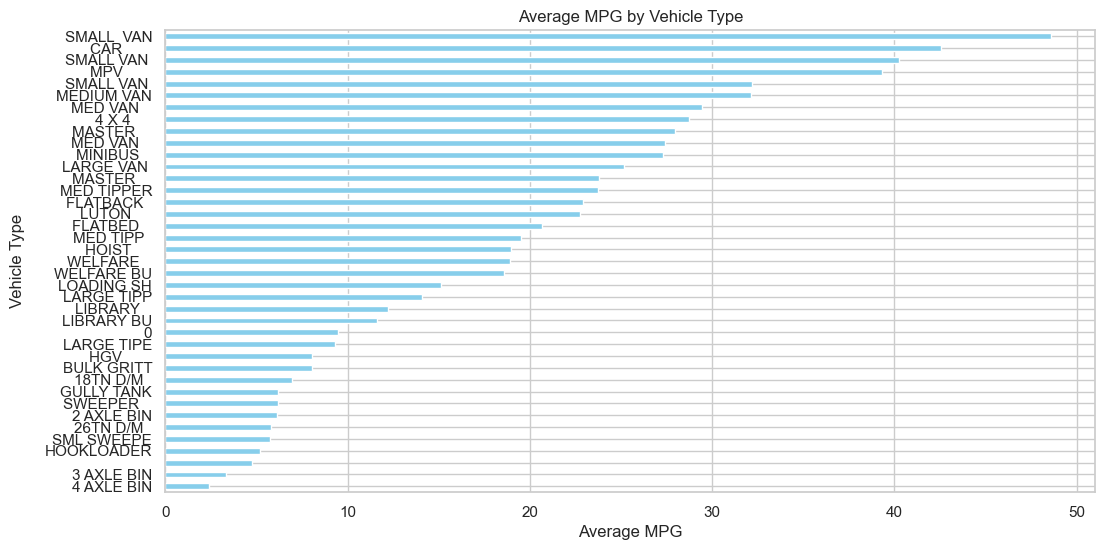

In [4]:
# Step 2: Handle NaN values (for example, drop rows with NaN in 'mpg')
df.dropna(subset=['mpg'], inplace=True)  # Drop rows where 'mpg' is NaN

# Step 3: Calculate Average MPG by Vehicle Type
plt.figure(figsize=(12, 6))
avg_mpg = df.groupby('vehicle')['mpg'].mean().sort_values()
avg_mpg.plot(kind='barh', color='skyblue')
plt.title('Average MPG by Vehicle Type')
plt.xlabel('Average MPG')
plt.ylabel('Vehicle Type')
plt.show()


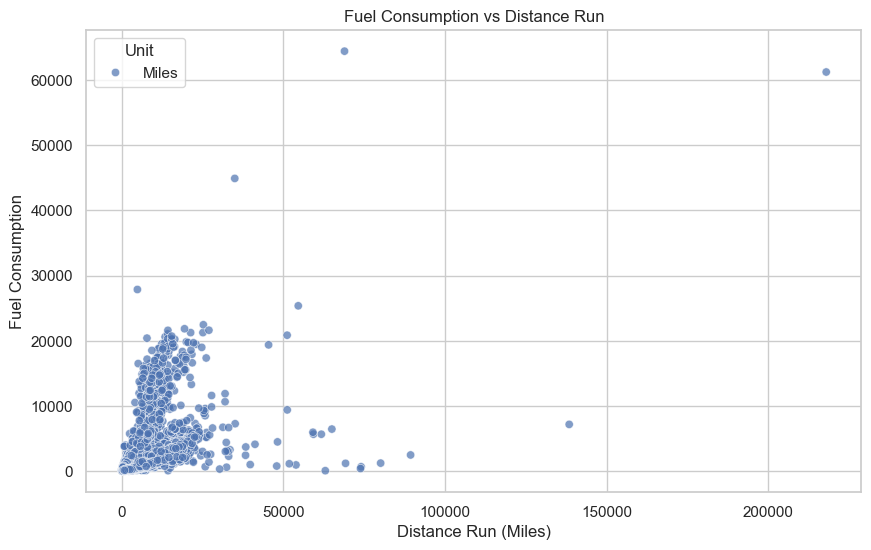

In [5]:
# 4. Fuel Consumption vs Distance Run
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='dist_run', y='fuel', hue='unit', alpha=0.7)
plt.title('Fuel Consumption vs Distance Run')
plt.xlabel('Distance Run (Miles)')
plt.ylabel('Fuel Consumption')
plt.legend(title='Unit')
plt.show()

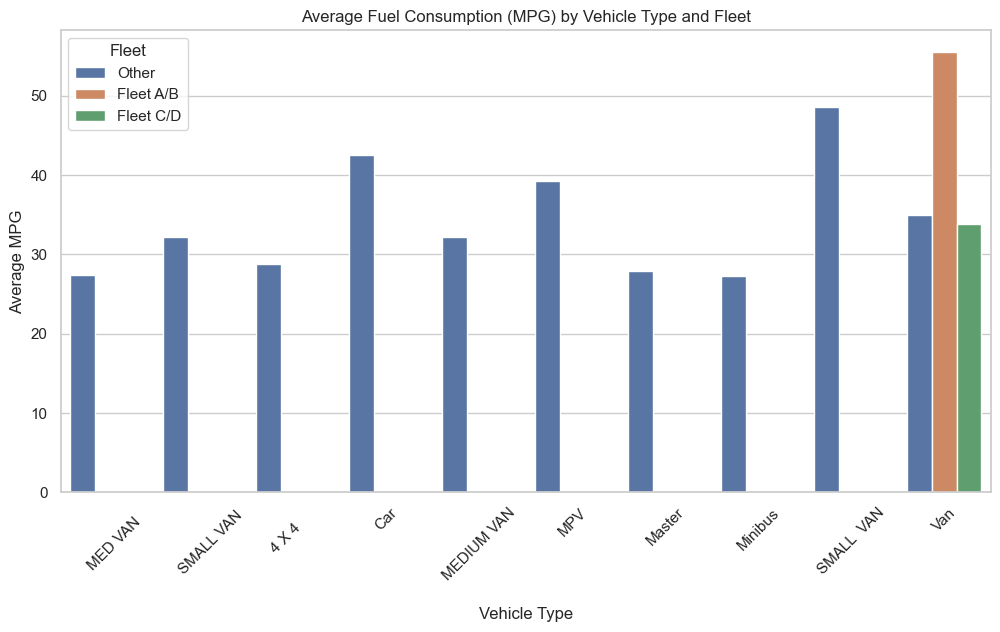

In [25]:
vehicle_type_mapping = {
    'GULLY TANK': 'Tanker',
    'SMALL VAN ': 'Van',
    'MED VAN   ': 'Van',
    'MED TIPPER': 'Tipper',
    'LIBRARY BU': 'Library',
    'LARGE VAN ': 'Van',
    '2 AXLE BIN': 'Bin',
    'LUTON     ': 'Luton',
    'CAR       ': 'Car',
    'MINIBUS   ': 'Minibus',
    'SML SWEEPE': 'Sweeper',
    'SWEEPER   ': 'Sweeper',
    'MASTER    ': 'Master',
    'WELFARE   ': 'Welfare',
    'MPV       ': 'MPV',
    'FLATBACK  ': 'Flatbed',
    'LARGE TIPP': 'Tipper',
    # Add more mappings as needed
}

# Step 1: Identify patterns and create a mapping function
def categorize_fleet(fleet_name):
    fleet_name = fleet_name.strip()  # Remove any leading/trailing whitespace
    if 'AY' in fleet_name or 'BD' in fleet_name:
        return 'Fleet A/B'
    elif 'BF' in fleet_name or 'BG' in fleet_name:
        return 'Fleet C/D'
    elif 'HGV' in fleet_name:
        return 'HGV Fleet'
    elif 'MED' in fleet_name:
        return 'Medium Fleet'
    elif 'LARGE' in fleet_name:
        return 'Large Fleet'
    elif 'SMALL' in fleet_name:
        return 'Small Fleet'
    elif 'WELFARE' in fleet_name:
        return 'Welfare Fleet'
    elif 'LIBRARY' in fleet_name:
        return 'Library Fleet'
    elif any(prefix in fleet_name for prefix in ['2 AXLE', '3 AXLE', '4 AXLE']):
        return 'Bin Vehicles'
    elif any(prefix in fleet_name for prefix in ['MASTER', 'MPV']):
        return 'Special Purpose Vehicles'
    elif any(prefix in fleet_name for prefix in ['SWEEPER', 'SML SWEEPE']):
        return 'Sweeper Vehicles'
    elif any(prefix in fleet_name for prefix in ['TANK', 'TIPPER']):
        return 'Tanker/Tipper Vehicles'
    else:
        return 'Other'
    
# Step 2: Apply the mapping function to create a new column for simplified fleet types
df['simplified_fleet'] = df['fleet'].apply(categorize_fleet)

# Apply the mapping to create a new column for simplified vehicle types
df['simplified_type'] = df['vehicle'].replace(vehicle_type_mapping)

# Step 2: Group by simplified type and fleet, calculating average MPG and total distance
fuel_consumption_analysis = df.groupby(['simplified_type', 'simplified_fleet'])[['mpg', 'dist_run']].agg(
    avg_mpg=('mpg', 'mean'),
    total_distance=('dist_run', 'sum')
).reset_index()

# Get the top N vehicle types based on average MPG
top_n = 10  # Change this number as needed
top_vehicle_types = fuel_consumption_analysis.groupby('simplified_type')['avg_mpg'].mean().nlargest(top_n).index

# Filter the analysis DataFrame to include only top vehicle types
fuel_consumption_analysis = fuel_consumption_analysis[fuel_consumption_analysis['simplified_type'].isin(top_vehicle_types)]

# Bar plot for average MPG by simplified vehicle type
plt.figure(figsize=(12, 6))
sns.barplot(data=fuel_consumption_analysis, x='simplified_type', y='avg_mpg', hue='simplified_fleet')
plt.title('Average Fuel Consumption (MPG) by Vehicle Type and Fleet')
plt.xticks(rotation=45)
plt.ylabel('Average MPG')
plt.xlabel('Vehicle Type')
plt.legend(title='Fleet')
plt.show()